In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../iris.csv")
dfSet = df[ df['variety'] == "Setosa" ]
dfVir = df[ df['variety'] == "Virginica"] 
dfVer = df[ df['variety'] == "Versicolor"]

In [3]:
features = ['sepal.length',
            'sepal.width',]
labels   = 'variety'

nazvy premennych v zmysle konvencie: vstup [x] -> vystup [y]

pd.DataFrame.map(dictionary) -> zmena na ciselnu hondotu (index)

In [4]:
x = df[features]
y = df[labels]
d = {'Setosa' : 0,
     'Virginica' : 1,
     'Versicolor' : 2}
y = y.map(d)

In [5]:
model = tf.keras.models.Sequential()

for i in range(32):
     model.add(tf.keras.layers.Dense(units=32, activation='gelu'))
model.add(tf.keras.layers.Dense(units=1))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [21]:
import IPython.display as ds

In [22]:
ds.clear_output()
model.fit(x,y, batch_size=32, epochs=400)

Epoch 1/400
5/5 [==============================] - 0s 4ms/step - loss: 0.1165 - mae: 0.2351
Epoch 2/400
5/5 [==============================] - 0s 4ms/step - loss: 0.1194 - mae: 0.2379
Epoch 3/400
5/5 [==============================] - 0s 4ms/step - loss: 0.1158 - mae: 0.2413
Epoch 4/400
5/5 [==============================] - 0s 4ms/step - loss: 0.1141 - mae: 0.2342
Epoch 5/400
5/5 [==============================] - 0s 4ms/step - loss: 0.1113 - mae: 0.2256
Epoch 6/400
5/5 [==============================] - 0s 5ms/step - loss: 0.1118 - mae: 0.2242
Epoch 7/400
5/5 [==============================] - 0s 5ms/step - loss: 0.1115 - mae: 0.2238
Epoch 8/400
5/5 [==============================] - 0s 5ms/step - loss: 0.1108 - mae: 0.2266
Epoch 9/400
5/5 [==============================] - 0s 5ms/step - loss: 0.1100 - mae: 0.2300
Epoch 10/400
5/5 [==============================] - 0s 4ms/step - loss: 0.1133 - mae: 0.2264
Epoch 11/400
5/5 [==============================] - 0s 5ms/step - loss: 0.1103 

In [9]:
p = np.linspace(4.1, 8.2, 1000)
q = np.linspace(1.9, 4.6, 500)
pq = np.zeros((500000, 2))
for i in range(len(q)):
    for j in range(len(p)):
        pq[j + i*len(p)] = [p[j], q[i]] 
P = np.transpose(pq)[0]
Q = np.transpose(pq)[1]

In [12]:
out = model.predict(pd.DataFrame(pq))

15625/15625 [==============================] - 19s 1ms/step


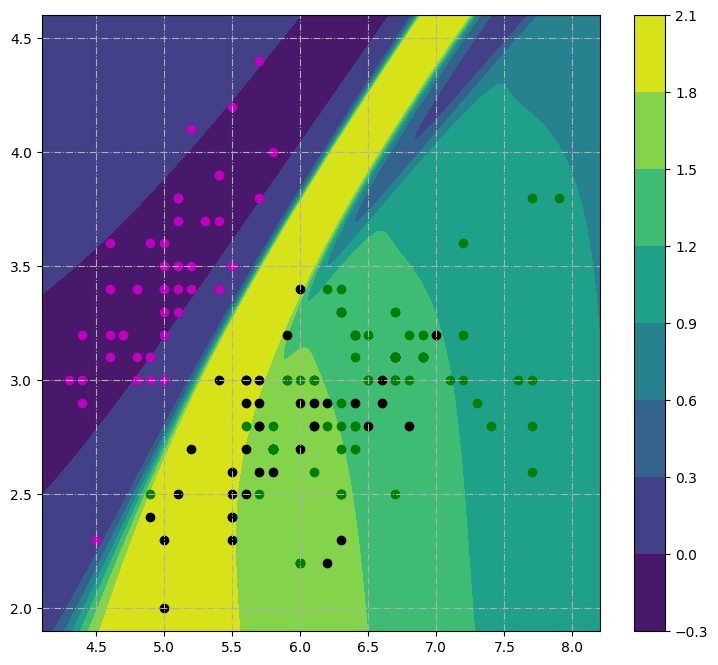

In [23]:
P, Q = np.meshgrid(p,q)

plt.figure(figsize=(9,8))
plt.grid(which='both', linestyle='dashdot')

plt.contourf(P, Q, np.reshape(out, (500,1000)))
plt.colorbar()

plt.scatter(dfSet['sepal.length'], dfSet['sepal.width'], c='m')
plt.scatter(dfVer['sepal.length'], dfVer['sepal.width'], c='k')
plt.scatter(dfVir['sepal.length'], dfVir['sepal.width'], c='g')


plt.show()


In [17]:
np.shape(input)

(1000, 500, 2)

In [18]:
np.shape(P)

(500, 1000)

In [19]:
P

array([[4.1       , 4.1041041 , 4.10820821, ..., 8.19179179, 8.1958959 ,
        8.2       ],
       [4.1       , 4.1041041 , 4.10820821, ..., 8.19179179, 8.1958959 ,
        8.2       ],
       [4.1       , 4.1041041 , 4.10820821, ..., 8.19179179, 8.1958959 ,
        8.2       ],
       ...,
       [4.1       , 4.1041041 , 4.10820821, ..., 8.19179179, 8.1958959 ,
        8.2       ],
       [4.1       , 4.1041041 , 4.10820821, ..., 8.19179179, 8.1958959 ,
        8.2       ],
       [4.1       , 4.1041041 , 4.10820821, ..., 8.19179179, 8.1958959 ,
        8.2       ]])